In [5]:
# Import Libary dan Load Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../Data/data.csv")
df.head()



,brand,color,size,price,offer_price
0,Tresmode,Black,6.5,4647,4153
1,Lavie,Gold,4,2446,1172
2,FILA,Red,6,2346,1898
3,Crocs,Red,5,5942,5868
4,Crocs,Blue,4,2942,2118


In [6]:
#Data Understanding
df.info()
df.describe()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5679 entries, 0 to 5678
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   brand        5679 non-null   object
 1   color        5679 non-null   object
 2   size         5679 non-null   object
 3   price        5679 non-null   int64 
 4   offer_price  5679 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 222.0+ KB


brand          0
color          0
size           0
price          0
offer_price    0
dtype: int64

In [7]:
#Data Cleaning
df = df.drop_duplicates()

df = df[df["price"] >= df["offer_price"]]

df["brand"] = df["brand"].str.lower().str.strip()

df.shape


(4637, 5)

In [8]:
#Feature Engineering
df["discount_amount"] = df["price"] - df["offer_price"]
df["discount_pct"] = (df["discount_amount"] / df["price"]) * 100

df.head()


,brand,color,size,price,offer_price,discount_amount,discount_pct
0,tresmode,Black,6.5,4647,4153,494,10.630514
1,lavie,Gold,4,2446,1172,1274,52.085037
2,fila,Red,6,2346,1898,448,19.096334
3,crocs,Red,5,5942,5868,74,1.245372
4,crocs,Blue,4,2942,2118,824,28.008158


In [9]:
#Analysis
# 1. Product Volume by Brand
brand_volume = (
    df.groupby("brand")
      .size()
      .reset_index(name="product_count")
      .sort_values(by="product_count", ascending=False)
)
brand_volume.head(10)

#untuk Visualisasi ada dibawah ini

,brand,product_count
5,crocs,1307
26,tresmode,498
8,franco leone,439
25,tory burch,205
17,nike,201
6,fila,179
29,woodland,160
13,labriza,156
21,reebok,131
20,puma,128


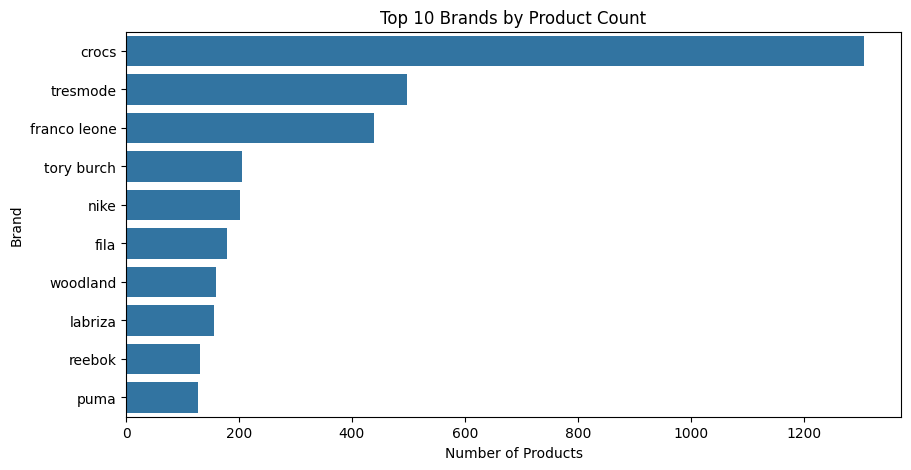

In [10]:
#visual
plt.figure(figsize=(10,5))
sns.barplot(data=brand_volume.head(10), x="product_count", y="brand")
plt.title("Top 10 Brands by Product Count")
plt.xlabel("Number of Products")
plt.ylabel("Brand")
plt.show()

In [11]:
# 2. Price Analysis by Brand
pricing_analysis = (
    df.groupby("brand")
      .agg(
          avg_price=("price", "mean"),
          avg_offer_price=("offer_price", "mean"),
          min_price=("price", "min"),
          max_price=("price", "max")
      )
      .reset_index()
      .sort_values(by="avg_price", ascending=False)
)

pricing_analysis.head(10)
#untuk Visualisasi ada dibawah ini

,brand,avg_price,avg_offer_price,min_price,max_price
25,tory burch,29909.682927,26121.560976,12947,37947
12,imperial india company,12308.068966,9269.551724,11446,13446
1,asics,10262.216216,6390.648649,5446,15446
23,toms,6578.914894,4971.936170,4447,11247
28,vanilla moon,5626.075630,4613.210084,3937,10437
0,adidas,5538.523364,4555.046729,3146,14446
17,nike,5305.323383,4150.711443,1746,13442
10,hidesign,4929.727273,4072.311688,2842,10437
11,hush puppies,4900.054054,4826.054054,2946,7446
20,puma,4531.937500,2567.515625,2946,8446


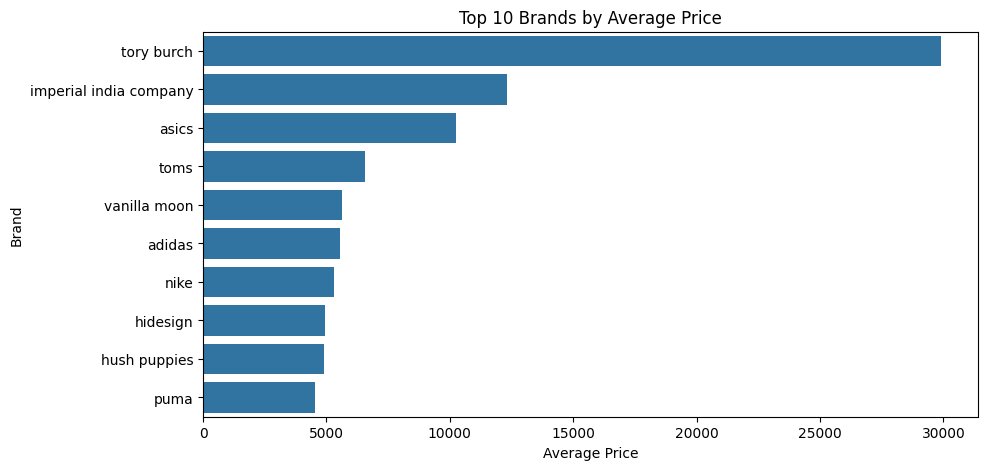

In [12]:
#visual
plt.figure(figsize=(10,5))
sns.barplot(data=pricing_analysis.head(10), x="avg_price", y="brand")
plt.title("Top 10 Brands by Average Price")
plt.xlabel("Average Price")
plt.ylabel("Brand")
plt.show()


In [13]:
# 3. Discount Behavior by Brand
discount_analysis = (
    df.groupby("brand")
      .agg(
          avg_discount_pct=("discount_pct", "mean"),
          avg_discount_amount=("discount_amount", "mean")
      )
      .reset_index()
      .sort_values(by="avg_discount_pct", ascending=False)
)

discount_analysis.head(10)
#untuk Visualisasi ada dibawah ini


,brand,avg_discount_pct,avg_discount_amount
14,lavie,58.800775,1712.888889
8,franco leone,49.726885,1658.252847
13,labriza,48.795841,1654.352564
18,numero uno,45.675988,1640.387755
20,puma,42.180415,1964.421875
1,asics,37.643646,3871.567568
3,buckaroo,36.437399,1103.918699
27,umbro,33.442094,1271.717949
15,lee cooper,32.430034,1094.838710
24,toni rossi,29.491977,1269.283019


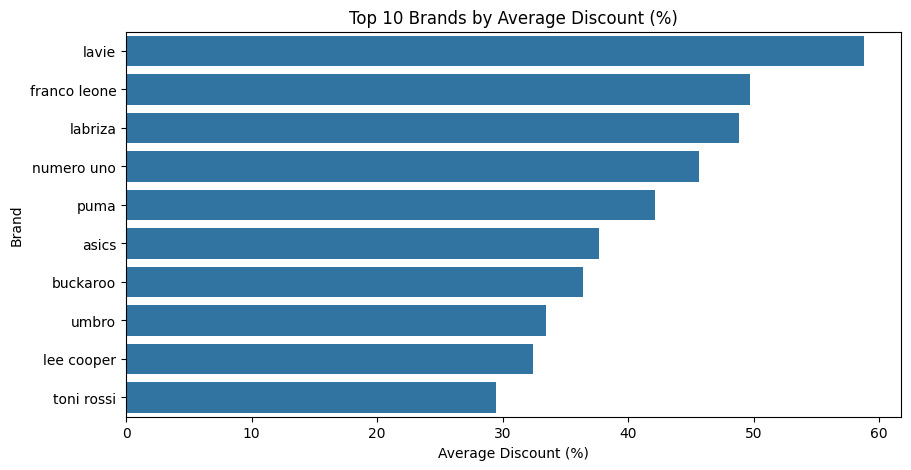

In [14]:
# visual
plt.figure(figsize=(10,5))
sns.barplot(data=discount_analysis.head(10), x="avg_discount_pct", y="brand")
plt.title("Top 10 Brands by Average Discount (%)")
plt.xlabel("Average Discount (%)")
plt.ylabel("Brand")
plt.show()


In [15]:
# 4. Product Variety by Brand (color & size)
variety_analysis = (
    df.groupby("brand")
      .agg(
          unique_colors=("color", "nunique"),
          unique_sizes=("size", "nunique")
      )
      .reset_index()
      .sort_values(by="unique_colors", ascending=False)
)

variety_analysis.head(10)


,brand,unique_colors,unique_sizes
28,vanilla moon,26,7
20,puma,26,17
8,franco leone,24,7
23,toms,23,12
13,labriza,20,6
5,crocs,18,16
6,fila,18,9
0,adidas,17,8
26,tresmode,16,10
25,tory burch,16,16


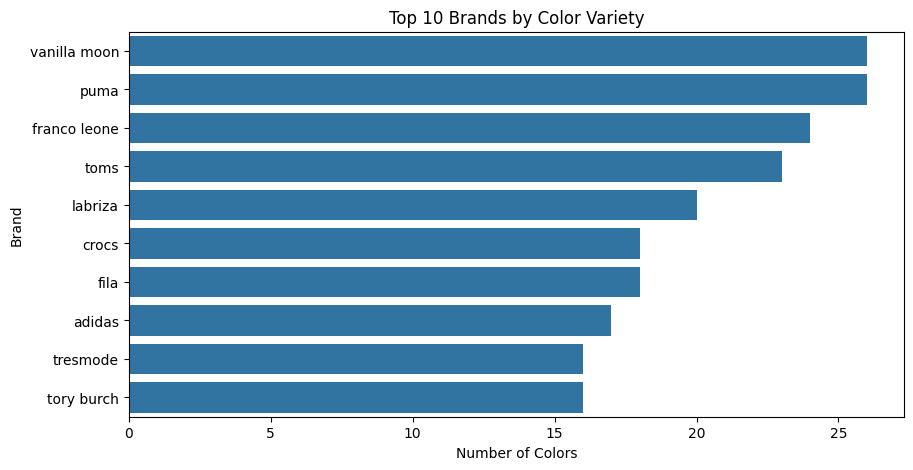

In [16]:
#visual
plt.figure(figsize=(10,5))
sns.barplot(data=variety_analysis.head(10), x="unique_colors", y="brand")
plt.title("Top 10 Brands by Color Variety")
plt.xlabel("Number of Colors")
plt.ylabel("Brand")
plt.show()


In [17]:
# Final Summary
final_summary = (
    brand_volume
    .merge(pricing_analysis, on="brand")
    .merge(discount_analysis, on="brand")
    .merge(variety_analysis, on="brand")
)

final_summary.head()


,brand,product_count,avg_price,avg_offer_price,min_price,max_price,avg_discount_pct,avg_discount_amount,unique_colors,unique_sizes
0,crocs,1307,3838.097934,3435.475134,1442,8442,10.300608,402.622800,18,16
1,tresmode,498,4417.662651,3817.706827,2347,12447,12.540053,599.955823,16,10
2,franco leone,439,3263.849658,1605.596811,1446,4442,49.726885,1658.252847,24,7
3,tory burch,205,29909.682927,26121.560976,12947,37947,12.985596,3788.121951,16,16
4,nike,201,5305.323383,4150.711443,1746,13442,21.095963,1154.611940,13,9


@Business Insights & Key Findings
*Brand Positioning (Premium vs Budget)

Berdasarkan analisis rata-rata harga dan diskon:

Beberapa brand memiliki rata-rata harga tinggi namun diskon relatif rendah, yang mengindikasikan premium positioning.

Brand dengan harga lebih rendah cenderung menawarkan diskon lebih agresif, menunjukkan strategi price-sensitive market.

Insight bisnis:
Brand premium menjaga persepsi nilai dengan diskon terbatas, sementara brand budget fokus pada volume penjualan.

*Product Volume & Market Strategy

Brand dengan jumlah produk terbanyak tidak selalu memiliki harga rata-rata terendah.

Hal ini menunjukkan bahwa banyaknya SKU digunakan untuk memperluas market coverage, bukan hanya untuk bersaing harga.

Insight bisnis:
Strategi product expansion lebih berpengaruh pada visibility brand dibanding sekadar penurunan harga.

*Discount Behavior Antar Brand

Terdapat perbedaan signifikan dalam rata-rata diskon (%) antar brand.

Beberapa brand secara konsisten memberikan diskon tinggi, mengindikasikan strategi promotional-driven sales.

Insight bisnis:
Diskon tinggi berpotensi meningkatkan penjualan jangka pendek, namun dapat menurunkan persepsi nilai brand dalam jangka panjang.

*Product Variety (Color & Size)

Brand dengan variasi warna dan ukuran lebih banyak cenderung menargetkan pasar yang lebih luas.

Brand dengan variasi terbatas biasanya fokus pada niche market atau model tertentu.

Insight bisnis:
Product variety menjadi faktor penting dalam meningkatkan customer reach tanpa harus menurunkan harga.

*Overall Conclusion

Analisis menunjukkan bahwa:

Harga, diskon, dan variasi produk merupakan indikator utama dalam menentukan strategi brand.

Tidak ada satu strategi yang paling benar; setiap brand menyesuaikan pendekatan berdasarkan target market dan positioning.

*Business Recommendation

Brand premium disarankan mempertahankan diskon rendah untuk menjaga eksklusivitas.

Brand volume-based dapat mengoptimalkan kombinasi diskon + variasi produk untuk meningkatkan konversi.

Analisis lanjutan dengan data penjualan aktual akan memperkuat rekomendasi strategis.